<a href="https://colab.research.google.com/github/LindholmLabs/Neural-Computing/blob/main/CS4287_Prj1_24293059_id2_id3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lars Jacobs (24293059)
William Lindholm (24273759)
name 3 (id3)



# Project 1 notes
-----------------

## Data Set

Skin cancer dataset. This dataset contains 1800 pictures of benign cell pictures and 1500 pictures of malignant cell pictures

## Pre-processing

This will be resizing and flipping the pictures randomly to improve the models generalization. Maybe grayscaling and exposure settings that can also be changed

## Network and hyperparameters

Probably this will be most work. Figuring out which network setup works best and makes most sense. Lots of research needed here to know what kind of layers and how big / how much of them to use.

## Loss Function

Try different loss functions and try to explain why some work better than others:
- MSE
- Cross entropy
- DICE


## Optimiser

Try different optimisers and try to explain why some work better than others:
- SGD
- ADAM


## Cross Fold Validation

Basically just use it, maybe 5 or 10 fold if needed

## Results

Display different kinds of metrics. For classification of our dataset we can use terms like FPR, TPR, precision, recall, accuracy, etc. Make a confusion matrix, stuff like that

## Evaluation

Try to see if we overfitted or underfitted the data. Not sure how to do this yet but we can figure it out.

## Experiments

Experiments with number of layers and what kind of layers for example. It will be crucial here to keep our notebook clean and make use of the code blocks in the notebook so we dont have to rerun all the code for different experiments.

In [ ]:
# Needed libraries
!pip install kaggle;

from google.colab import files

files.upload()

! mkdir ~/.kaggle;
! cp kaggle.json ~/.kaggle/;
! chmod 600 ~/.kaggle/kaggle.json;
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                       Student Performance Factors                         94KB  2024-09-02 10:53:57          34037        605  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset   Mobile Device Usage and User Behavior Dataset       11KB  2024-09-28 20:21:12           6283        113  1.0              
abdulszz/spotify-most-streamed-songs                          Spotify Most Streamed Songs                         60KB  2024-09-07 18:23:14          13488        174  1.0              
valakhorasani/gym-members-exercise-datase

**Loading the dataset**

In [ ]:
!kaggle datasets download -d rm1000/skin-cancer-isic-images;
!unzip skin-cancer-isic-images.zip;



Dataset URL: https://www.kaggle.com/datasets/rm1000/skin-cancer-isic-images
License(s): CC0-1.0
 97% 49.0M/50.6M [00:04<00:00, 18.0MB/s]
100% 50.6M/50.6M [00:04<00:00, 11.7MB/s]
Archive:  skin-cancer-isic-images.zip
  inflating: benign/0000.jpg         
  inflating: benign/0001.jpg         
  inflating: benign/0002.jpg         
  inflating: benign/0003.jpg         
  inflating: benign/0004.jpg         
  inflating: benign/0005.jpg         
  inflating: benign/0006.jpg         
  inflating: benign/0007.jpg         
  inflating: benign/0008.jpg         
  inflating: benign/0009.jpg         
  inflating: benign/0010.jpg         
  inflating: benign/0011.jpg         
  inflating: benign/0012.jpg         
  inflating: benign/0013.jpg         
  inflating: benign/0014.jpg         
  inflating: benign/0015.jpg         
  inflating: benign/0016.jpg         
  inflating: benign/0017.jpg         
  inflating: benign/0018.jpg         
  inflating: benign/0019.jpg         
  inflating: benign/0020

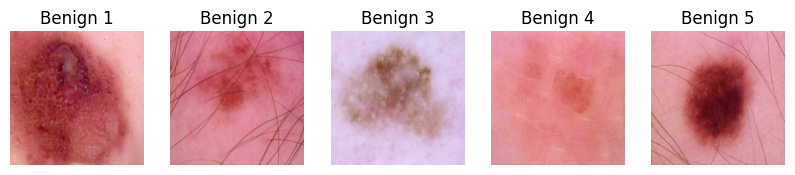

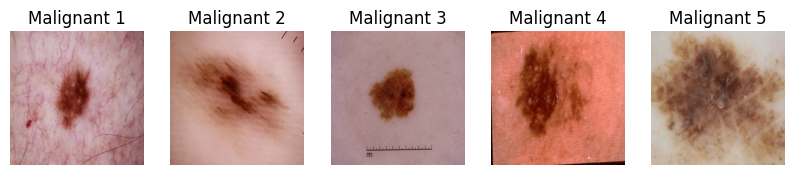

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path for your dataset
benign_path = './benign'
malignant_path = './malignant'

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = Image.open(img_path)
        images.append(img)
    return images

# Load benign and malignant images
benign_images = load_images_from_folder(benign_path)
malignant_images = load_images_from_folder(malignant_path)

# Display a few images from both categories
def display_images(images, label, n=5):
    plt.figure(figsize=(10, 5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.title(f'{label} {i+1}')
        plt.axis('off')
    plt.show()

# Display 5 benign and 5 malignant images
display_images(benign_images, 'Benign', 5)
display_images(malignant_images, 'Malignant', 5)


# Preprocess dataset into

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import train_test_split for validation set creation

NUM_CLASSES = 2
IMG_SIZE = (228, 228)
TEST_SIZE = 0.2  # 20% of data for test
VAL_SIZE = 0.1   # 20% of training data for validation

# Function to resize and normalize the images using TensorFlow/Keras
def preprocess_images(images):
    # Convert the images to a NumPy array and resize
    images_resized = np.array([tf.image.resize(img, IMG_SIZE).numpy() for img in images])

    # Normalize the images to [0, 1] range
    images_resized = images_resized.astype('float32') / 255.0
    return images_resized

# Function to load data and split into train, validation, and test sets
def load_data():
    # Preprocess benign and malignant images
    benign_images_array = preprocess_images(benign_images)
    malignant_images_array = preprocess_images(malignant_images)

    # Create labels: 0 for benign, 1 for malignant
    benign_labels = np.zeros(len(benign_images_array))
    malignant_labels = np.ones(len(malignant_images_array))

    # Combine images and labels
    X_data = np.concatenate((benign_images_array, malignant_images_array), axis=0)
    y_data = np.concatenate((benign_labels, malignant_labels), axis=0)

    # Shuffle the data manually using TensorFlow's random shuffling
    indices = np.arange(X_data.shape[0])
    np.random.shuffle(indices)
    X_data = X_data[indices]
    y_data = y_data[indices]

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=TEST_SIZE, random_state=42)

    # Further split the training data to create a validation set (80% training, 20% validation of training data)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=VAL_SIZE, random_state=42)

    # Convert labels to one-hot encoding
    y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_val = tf.keras.utils.to_categorical(y_val, NUM_CLASSES)
    y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

    return X_train, y_train, X_val, y_val, X_test, y_test

# Call the function and load the data
X_train, y_train, X_val, y_val, X_test, y_test = load_data()

# Print the shapes of the datasets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_val: {X_val.shape}')
print(f'Shape of y_val: {y_val.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')


Shape of X_train: (2373, 228, 228, 3)
Shape of y_train: (2373, 2)
Shape of X_val: (264, 228, 228, 3)
Shape of y_val: (264, 2)
Shape of X_test: (660, 228, 228, 3)
Shape of y_test: (660, 2)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

EPOCHS = 30
NUM_CLASSES = 2  # Binary classification (benign, malignant)

def build_model():
    model = models.Sequential()

    # 1st block
    model.add(layers.Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))

    # 2nd block
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))

    # 3rd block
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))

    # Dense layer
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

    return model

X_train, y_train, X_val, Y_val, X_test, y_test = load_data()

# Build and compile the model
model = build_model()
model.compile(loss='categorical_crossentropy',  # For multi-class classification (2 output classes)
              optimizer='RMSprop',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
batch_size = 128
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=EPOCHS, validation_data=(X_val, y_val))

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=batch_size)

# Print test results
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 228, 228, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 228, 228, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 228, 228, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 228, 228, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 114, 114, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 114, 114, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 114, 114, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 114, 114, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 114, 114, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 114, 114, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 57, 57, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 57, 57, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 57, 57, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 57, 57, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 57, 57, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 57, 57, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 13,134,242 (50.10 MB)

 Trainable params: 13,133,346 (50.10 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5980 - loss: 50.8909 - val_accuracy: 0.5985 - val_loss: 6.5906
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.6606 - loss: 1.3048 - val_accuracy: 0.5985 - val_loss: 2.9594
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.7289 - loss: 1.1701 - val_accuracy: 0.4129 - val_loss: 3.8675
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.7173 - loss: 0.5580 - val_accuracy: 0.5947 - val_loss: 5.0859
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.7406 - loss: 0.5429 - val_accuracy: 0.5038 - val_loss: 0.8525
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.7308 - loss: 0.5725 - val_accuracy: 0.4053 - val_loss: 13.1580
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.7666 - loss: 0.5342 - val_accuracy: 0.4053 - val_loss: 26.0208
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.7329 - loss: 0.4749 - val_accuracy: 0.4053 -

# Results

# Results

## 1
- 10 epochs
- loss: categorical_crossentropy
- Batch size: 64
- optimizer: RMSprop
- activation: relu (for all layers except output)

<br>
Test score: 2.2877860069274902<br>
Test accuracy: 0.7651515007019043

## 2
- 20 epochs
- loss: categorical_crossentropy
- Batch size: 64
- optimizer: RMSprop
- activation: relu (for all layers except output)

<br>
Test loss: 0.45444709062576294 <br>
Test accuracy: 0.831818163394928

## 3
- 30 epochs
- loss: categorical_crossentropy
- Batch size: 128
- optimizer: RMSprop
- activation: relu (for all layers except output)

<br>
Test loss: 1.4917829036712646 <br>
Test accuracy: 0.4848484992980957



**Introduced separate test and validation set after this point**

## 4
- 30 epochs
- loss: categorical_crossentropy
- Batch size: 128
- optimizer: RMSprop
- activation: relu (for all layers except output)

<br>
Test loss: 1.4917829036712646 <br>
Test accuracy: 0.4848484992980957


**Pre Processing Testing**